In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_KP(path = "datasets/KP24.txt"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    Capacity = int(inputData[0].strip())
    N = int(inputData[1].strip())
    item_list=[]
    for item in inputData[2:]:
        #del '\n' 
        item = item.strip()
        #split by ' '
        item = item.split(' ')
        #(p, w)
        item_list.append((int(item[0]), int(item[1])))

    return Capacity, N, item_list

In [3]:
def DistanceMatrix(cities, n):
    dis_matrix = np.zeros([n,n])

    for i in range(n):
        for j in range(i+1, n):
            a = np.array(cities[i])
            b = np.array(cities[j])
            c = a - b
            dis_matrix[i, j] = np.sqrt(np.sum(c*c))
            dis_matrix[j, i] = dis_matrix[i, j]

    return dis_matrix

In [4]:
def load_TSP(path = "datasets/eil51.txt"):
    with open(path, 'r') as f:
        inputData = f.readlines()
    
    N = int(inputData[0].strip())
    node_list=[]
    for node in inputData[1:]:
        #del '\n' 
        node = node.strip()
        #split by ' '
        node = node.split(' ')
        node_list.append((int(node[1]), int(node[2])))

    dis_matrix = DistanceMatrix(node_list, N)
    
    return node_list, N, dis_matrix

In [5]:
node_list, num_cities, dis_matrix = load_TSP()
print(node_list)
print(num_cities)

[(37, 52), (49, 49), (52, 64), (20, 26), (40, 30), (21, 47), (17, 63), (31, 62), (52, 33), (51, 21), (42, 41), (31, 32), (5, 25), (12, 42), (36, 16), (52, 41), (27, 23), (17, 33), (13, 13), (57, 58), (62, 42), (42, 57), (16, 57), (8, 52), (7, 38), (27, 68), (30, 48), (43, 67), (58, 48), (58, 27), (37, 69), (38, 46), (46, 10), (61, 33), (62, 63), (63, 69), (32, 22), (45, 35), (59, 15), (5, 6), (10, 17), (21, 10), (5, 64), (30, 15), (39, 10), (32, 39), (25, 32), (25, 55), (48, 28), (56, 37), (30, 40)]
51


In [6]:
Capacity, N, item_list = load_KP()
print(Capacity)
print(N)
print(item_list)

6404180
24
[(825594, 382745), (1677009, 799601), (1676628, 909247), (1523970, 729069), (943972, 467902), (97426, 44328), (69666, 34610), (1296457, 698150), (1679693, 823460), (1902996, 903959), (1844992, 853665), (1049289, 551830), (1252836, 610856), (1319836, 670702), (953277, 488960), (2067538, 951111), (675367, 323046), (853655, 446298), (1826027, 931161), (65731, 31385), (901489, 496951), (577243, 264724), (466257, 224916), (369261, 169684)]


In [7]:
D = num_cities - 1
if D < N: D = N

In [8]:
def decode_TSP(indiv, n = num_cities - 1):
    decode = []
    for i in range(n):
        decode.append((i+1, indiv[i]))
    decode.sort(key=lambda tup: tup[1], reverse=False)
    sol = [i[0] for i in decode]
    return np.array(sol)


def decode_KP(indiv, n = N):
    sol = []
    for i in indiv[:n]:
        if i < 0.5: sol.append(0)
        else: sol.append(1)
    return np.array(sol)


In [9]:
decode_TSP([0.4, 0.7, 0.2, 0.5], n = 4)

array([3, 1, 4, 2])

In [10]:
decode_KP([0.4, 0.7, 0.2, 0.5], n = 4)

array([0, 1, 0, 1])

In [11]:
import math

def cost_tsp(indiv):
    n = len(indiv) - 1
    cost = dis_matrix[0, indiv[0]]
    for i in range(n):
        cost += dis_matrix[indiv[i], indiv[i+1]]
    cost += dis_matrix[indiv[n], 0]

    return -cost

def cost_kp(indiv, n = N):
    cost = 0
    weight_total = 0

    for i in range(n):
        cost += indiv[i]*item_list[i][0]
        weight_total += indiv[i]*item_list[i][1]
 
    if(weight_total > Capacity):
        cost -= 100*(weight_total - Capacity)
    return cost

def Factorial_Cost(indiv, t):
    if t == 0:
        decode = decode_TSP(indiv)
        return cost_tsp(decode)
    elif t == 1:
        decode = decode_KP(indiv)
        return cost_kp(decode)
    else:
        return cost_tsp(decode_TSP(indiv)), cost_kp(decode_KP(indiv))

In [12]:
mark_tsp = set()
mark_kp = set()

def check_generated(individual, t = 2):
    res = False

    if t == 0 or t == 2:
        tsp = decode_TSP(individual)
        hash_val = hash(tsp.tobytes())
        pre_size = len(mark_tsp)
        mark_tsp.add(hash_val)
        if(pre_size == len(mark_tsp)): res = True

    if t == 1 or t == 2:
        kp = decode_KP(individual)
        hash_val = hash(kp.tobytes())
        pre_size = len(mark_kp)
        mark_kp.add(hash_val)
        if(pre_size == len(mark_kp)): res = True
    
    return res

In [13]:
def GeneratorIndiv(dims=D):
    
    indiv = np.random.random_sample((dims, ))
    while check_generated(indiv):
        indiv = np.random.random_sample((dims, ))
    
    return indiv, Factorial_Cost(indiv, t=2)

In [14]:
GeneratorIndiv()

(array([0.15384696, 0.54195449, 0.17071363, 0.94538879, 0.90298497,
        0.45217341, 0.70269774, 0.82344707, 0.710465  , 0.15904023,
        0.81420325, 0.72077392, 0.36412299, 0.1607664 , 0.72725848,
        0.11857747, 0.84633543, 0.75464837, 0.28815226, 0.81228511,
        0.16686087, 0.46616091, 0.48885031, 0.69892957, 0.00674476,
        0.50467889, 0.62809619, 0.57811715, 0.88391202, 0.37477147,
        0.59386952, 0.88736551, 0.540178  , 0.05039314, 0.92137886,
        0.71283942, 0.34773443, 0.01948325, 0.6582682 , 0.78859436,
        0.03579217, 0.57965543, 0.97650208, 0.06371956, 0.75285209,
        0.45271957, 0.50436689, 0.28067134, 0.08121623, 0.93725622]),
 (-1677.8218927941898, 11654339))

In [15]:
def Generate_Eval(sizePop, d = D):
    population = []
    tsp_cost = []
    kp_cost = []

    for i in range(sizePop):
        pi, fcosti = GeneratorIndiv()

        #(pi, ti, fitnessi, fac_costi)
        population.append([pi, -1, -1.0, -1.0])
        tsp_cost.append((i, fcosti[0]))
        kp_cost.append((i, fcosti[1]))
    
    tsp_cost.sort(key=lambda p: p[1], reverse = True)
    kp_cost.sort(key=lambda p: p[1], reverse = True)

    for i in range(sizePop):
        #if fitness < 1/rank
        if population[tsp_cost[i][0]][2] < 1/(i+1):
            population[tsp_cost[i][0]][1] = int(0)
            population[tsp_cost[i][0]][2] = 1/(i+1)
            population[tsp_cost[i][0]][3] = tsp_cost[i][1]
            
        if population[kp_cost[i][0]][2] < 1/(i+1):
            population[kp_cost[i][0]][1] = int(1)
            population[kp_cost[i][0]][2] = 1/(i+1)
            population[kp_cost[i][0]][3] = kp_cost[i][1]
            

    return population

In [16]:
def chooseParents(pop):
    n = len(pop)
    index1 = np.random.randint(n)
    while True:
        index2 = np.random.randint(n)
        if index1 != index2: break
    index3 = np.random.randint(n)
    while True:
        index4 = np.random.randint(n)
        if index3 != index4: break
    
    if pop[index1][2] > pop[index2][2]:
        p1 = pop[index1]
    else:
        p1 = pop[index2]
    
    if pop[index3][2] > pop[index4][2]:
        p2 = pop[index3]
    else:
        p2 = pop[index4]
    
    return p1, p2

In [17]:
import math

def cross_SBX(p1, p2, nc = 2):
    u = np.random.random_sample()
    if u < 0.5:
        beta = math.pow(2*u, 1/(nc+1))
    else:
        beta = math.pow(0.5/(1-u), 1/(nc+1))

    c1 = 0.5*((1+beta)*p1 + (1-beta)*p2)
    c2 = 0.5*((1-beta)*p1 + (1+beta)*p2)

    return c1, c2

In [18]:
cross_SBX(np.array([0.3546, 0.6078, 0.55564646]), np.array([0.55564646,0.6778, 0.132135]))

(array([0.3843922 , 0.618173  , 0.49288814]),
 array([0.52585426, 0.667427  , 0.19489332]))

In [19]:
def mutation(individual, e = 0.15):
    n = len(individual)
    res = np.array(individual)

    index1 = np.random.randint(n)
    index2 = np.random.randint(n)
    while index1 == index2:
        index2 = np.random.randint(n)

    res[index1] -= e
    res[index2] += e

    #res = np.array(individual) - np.random.uniform(-e, e, len(individual))

    return res

In [20]:
def update_fitness(pop):
    task = [[], []]

    for indiv in pop:
        task[indiv[1]].append(indiv)
    
    task[0].sort(key=lambda p: p[3], reverse = True)
    task[1].sort(key=lambda p: p[3], reverse = True)

    for i in range(len(task[0])):
        task[0][i][2] = 1/(i+1)
    for i in range(len(task[1])):
        task[1][i][2] = 1/(i+1)

    return task[0] + task[1]

In [21]:
import random

def selection(pre_pop, offs_pop):
    pop = pre_pop + offs_pop
    pop = update_fitness(pop)
    pop.sort(key=lambda indiv: indiv[2], reverse = True)
    next_pop = pop[:len(pre_pop)]
    #random.shuffle(next_pop)

    return next_pop

In [22]:
def GA(size_pop, num_gens, rmp):
    population = Generate_Eval(sizePop=size_pop)
    logg = []

    t = 0
    while t < num_gens:
        offs_pop = []
        n_offs = 0

        while n_offs < size_pop:
            p1, p2 = chooseParents(population)

            if p1[1] == p2[1]:
                c1, c2 = cross_SBX(p1[0], p2[0])
                
                if not check_generated(c1, t=p1[1]):
                    offs_pop.append([c1, p1[1], -1, Factorial_Cost(c1, p1[1])])
                    n_offs += 1
                
                if not check_generated(c2):
                    offs_pop.append([c2, p1[1], -1, Factorial_Cost(c2, p1[1])])
                    n_offs += 1
            
            elif np.random.random_sample() < rmp:
                c1, c2 = cross_SBX(p1[0], p2[0])
                
                if not check_generated(c1, t=p1[1]) and np.random.random_sample() < 0.5:
                    offs_pop.append([c1, p1[1], -1, Factorial_Cost(c1, p1[1])])
                    n_offs += 1
                else:
                    offs_pop.append([c1, p2[1], -1, Factorial_Cost(c1, p2[1])])
                    n_offs += 1
        
                if not check_generated(c2, t=p2[1]) and np.random.random_sample() < 0.5:
                    offs_pop.append([c2, p1[1], -1, Factorial_Cost(c2, p1[1])])
                    n_offs += 1
                else:
                    offs_pop.append([c2, p2[1], -1, Factorial_Cost(c2, p2[1])])
                    n_offs += 1
            
            else:
                c1 = mutation(p1[0])
                if not check_generated(c1, t=p1[1]):
                    offs_pop.append([c1, p1[1], -1, Factorial_Cost(c1, p1[1])])
                    n_offs += 1

                c2 = mutation(p2[0])
                if not check_generated(c2, t=p2[1]):
                    offs_pop.append([c2, p2[1], -1, Factorial_Cost(c2, p2[1])])
                    n_offs += 1

        population = selection(population, offs_pop)
        best = [0, 0]
        
        if population[1][2] == 1.0:
            best[population[0][1]] = population[0][0]
            best[population[1][1]] = population[1][0]
        else:
            best[0] = population[0][0]
            best[1] = population[0][0]
        
        logg.append([t, best])
        random.shuffle(population)
        t += 1
    
    return logg

In [23]:
def show(his):
    input = np.array(his, dtype=object)
    x = input[:, 0]
    res = np.array(input[:, 1])
    res_tsp = []
    res_kp = []
    for indivs in res:
        res_tsp.append(-Factorial_Cost(indivs[0], 0))
        res_kp.append(Factorial_Cost(indivs[1], 1))
    res_tsp = np.array(res_tsp)
    res_kp = np.array(res_kp)

    plt.figure(figsize=(20, 7))

    plt.subplot(1, 2, 1)
    plt.plot(x, res_tsp)
    plt.title('TSP: best = '+ str(res_tsp[-1]))

    plt.subplot(1, 2, 2)
    plt.plot(x, res_kp)
    plt.title('KPbest = '+ str(res_kp[-1]))

    plt.show()

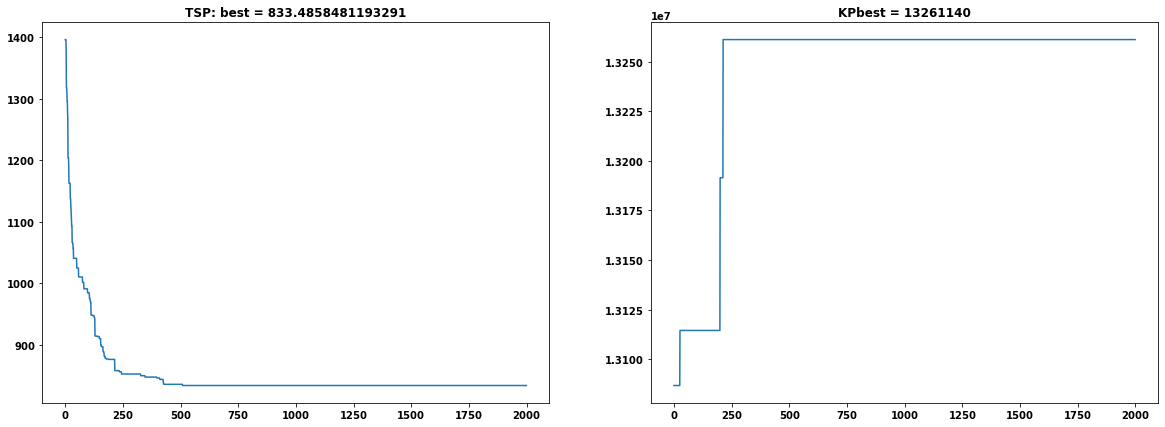

In [27]:
history = GA(40, 2000, 0.3)
show(history)

In [25]:
#op_eil51 = 426
#op_kp24 = 13.549.094